In [1]:
!pip install scikit-plot

You should consider upgrading via the '/home/milselarch/projects/AISG/venv/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import sklearn.metrics
import scikitplot as skplt
import matplotlib.pyplot as plt
import numpy as np

from tqdm.auto import tqdm

path = 'csvs/aisg-preds-211013-1810.csv'
df = pd.read_csv(path)

In [3]:
df

,filename,label,trained_upon,median_pred,mean_pred,3rd_quartile_pred,1st_quartile_pred,group_pred
0,9a22372d22a52397.mp4,1,0,0.942156,0.942156,0.952945,0.939705,0.945661
1,9bc4f1306bb8e2cd.mp4,1,0,0.954891,0.954891,0.962717,0.951176,0.958116
2,88fe2a902a9d8cc7.mp4,1,0,0.953008,0.953008,0.961259,0.949398,0.957011
3,1f3cbda142d0944a.mp4,1,0,0.955451,0.955451,0.963568,0.950211,0.958797
4,63bed62257daccaf.mp4,1,0,0.955592,0.955592,0.963512,0.952683,0.958823
...,...,...,...,...,...,...,...,...
6938,f5c4bfb20068f129.mp4,0,1,0.003744,0.003744,0.006697,0.002873,0.004893
6939,b7b7b7f6db7f6e2e.mp4,0,1,0.104911,0.104911,0.145143,0.091448,0.118912
6940,c3fc75289ae3b41e.mp4,0,1,0.016028,0.016028,0.090767,0.002062,0.058182
6941,519e97d4c90aaa1c.mp4,0,1,0.690651,0.690651,0.719363,0.662181,0.695907


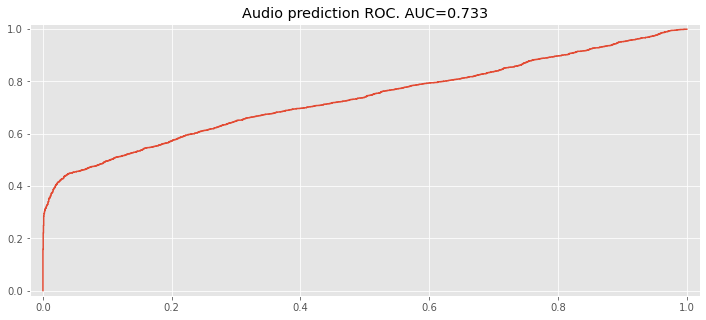

In [4]:
labels = df['label'].to_numpy()
preds = df['median_pred'].to_numpy()
fpr, tpr, _ = sklearn.metrics.roc_curve(labels, preds)
auc = sklearn.metrics.roc_auc_score(labels, preds)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.title("Audio prediction ROC. AUC="+str(round(auc, 3)))
plt.plot(fpr, tpr)


In [28]:
import sys
sys.path.append("..")

from FaceAnalysis import FaceCluster

face_map = FaceCluster.make_face_map(
    '../stats/bg-clusters/face-vid-labels.csv'
)

filenames = df['filename'].to_numpy()
face_preds = []

for filename in filenames:
    face_pred = face_map.get(filename, 0.5)
    if face_pred == 1:
        face_preds.append(1)
    else:
        face_preds.append(0)

face_preds = np.array(face_preds, dtype=float)
print(face_preds)

[1. 1. 1. ... 0. 0. 0.]


In [ ]:
labels = df['label'].to_numpy()
preds = df['median_pred'].to_numpy()
print(preds.shape, face_preds.shape)
combined_preds = np.array([preds, face_preds])

# print(preds)
print(combined_preds)
op_preds = np.max(combined_preds, axis=0)

fpr, tpr, _ = sklearn.metrics.roc_curve(labels, op_preds)
auc = sklearn.metrics.roc_auc_score(labels, op_preds)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.title("Optimistic audio prediction ROC. AUC="+str(round(auc, 3)))
plt.plot(fpr, tpr)


(6943,) (6943,)
[[9.42155659e-01 9.54890847e-01 9.53007996e-01 ... 1.60283148e-02
  6.90651178e-01 9.43817955e-04]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [ ]:
print(0.287 / (0.287 + 0.0121 * (1-0.287)))

In [ ]:
audio_label_csv = pd.read_csv('csvs/audio-labels-211014-1653.csv')
filenames = audio_label_csv['filename'].to_numpy()
audio_labels = audio_label_csv['fake_audio'].to_numpy()
print(filenames)
print(audio_labels)

In [ ]:
preds = []
for filename in tqdm(filenames):
    row = df[df['filename'] == filename]
    pred = row['median_pred'].to_numpy()[0]
    preds.append(pred)

preds = np.array(preds)
print(preds)

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.hist(preds, bins=25)

In [ ]:
print(df['label'].to_numpy())
fpr, tpr, _ = sklearn.metrics.roc_curve(audio_labels, preds)
auc = sklearn.metrics.roc_auc_score(audio_labels, preds)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05])
plt.title("Audio prediction ROC. AUC="+str(round(auc, 10)))
plt.plot(fpr, tpr)
